<a href="https://colab.research.google.com/github/sysung/w266-final-project/blob/master/roberta/Identifying_MisInformation_(RoBERTa_Premise_Articles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading packages and dataset

In [ ]:
!curl -O https://cs.uwaterloo.ca/~ppoupart/fact-check/WatClaimCheck.tar.gz
!tar -xzf WatClaimCheck.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1107M  100 1107M    0     0  56.1M      0  0:00:19  0:00:19 --:--:-- 59.1M


In [ ]:
!pip install transformers

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.7 

In [ ]:
!pip install condacolab

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [ ]:
!pip install tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.8 MB/s eta 0:00:00


In [ ]:
!conda install -c pytorch faiss-gpu

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - faiss-gpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    cudatoolkit-11.8.0         |      h4ba93d1_12       682.8 MB  conda-forge
    faiss-1.7.4                |py310cuda112hae2f2aa_0_cuda         1.5 MB  conda-forge
    

## Import and setting up notebook

In [ ]:
# RoBERTa
from transformers import RobertaTokenizerFast, TFRobertaModel
from simpletransformers.retrieval import RetrievalModel, RetrievalArgs
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from itertools import chain

import datetime as dt
import json
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Num GPUs Available:  1


In [ ]:
def explode_dictionary(pd_df: pd.DataFrame, field: str) -> pd.DataFrame:
    '''Explodes a dictionary within a column as multiple columns and then drops the parent field'''
    return pd.concat([pd_df.drop(field, axis=1), pd_df[field].apply(pd.Series)], axis=1)


def clean_pd_df(pd_df: pd.DataFrame) -> pd.DataFrame:
    '''Extracts field from dataframe, casts review_date to datetime and removes id'''

    print("Extracting fields from metadata")
    pd_df = explode_dictionary(pd_df, 'metadata')

    print("Extracting fields from label")
    pd_df = explode_dictionary(pd_df, 'label')

    # Set claim_date as review_date if review_date does not exist
    pd_df['review_date'].fillna(pd_df['claim_date'], inplace=True)

    # Convert review_date to date time
    pd_df['review_date'] = pd.to_datetime(pd_df['review_date'].str.split('T', expand=True)[0])

    # Drop ID
    pd_df = pd_df.drop(columns=['id'])

    return pd_df


def download_dataset(dataset_fp: str) -> tuple:
    '''
    Reads the WatClaimCheck dataset from the filepath and returns a pandas dataframe of the train, valid, and test datasets
    Reads the WatClaimCheck dataset from the filepath and returns a pandas dataframe of the train, valid, and test datasets

    Parameters:
    dataset_fp (str): Filepath of dataset

    Returns:
    tuple: Train, Valid, Test Pandas Dataframes
    '''

    # Get full path of json files
    train_json_fp = os.path.join(dataset_fp, 'train.json')
    valid_json_fp = os.path.join(dataset_fp, 'valid.json')
    test_json_fp = os.path.join(dataset_fp, 'test.json')

    # Get pandas dataframe from json
    train_pd_df = pd.read_json(train_json_fp)
    valid_pd_df = pd.read_json(valid_json_fp)
    test_pd_df = pd.read_json(test_json_fp)

    # Get all of the data corresponding to the metadata and labels
    clean_train_pd_df = clean_pd_df(train_pd_df)
    clean_valid_pd_df = clean_pd_df(valid_pd_df)
    clean_test_pd_df = clean_pd_df(test_pd_df)

    return clean_train_pd_df, clean_valid_pd_df, clean_test_pd_df

def download_article(dataset_fp: str, article_file: str) -> dict:
    '''
    Downloads an article from the WatClaimCheck Dataset

    Parameters:
    dataset_fp   (str): Filepath of dataset
    article_file (str): Filepath of article

    Returns:
    dict: Article JSON
    '''

    # Read articles as json
    full_article_fp = open(os.path.join(dataset_fp, 'articles', article_file))
    json_data = json.load(full_article_fp)
    full_article_fp.close()

    return json_data

In [ ]:
DATASET_FP = "./WatClaimCheck_dataset"

# Retrieve dataset
train_df, valid_df, test_df = download_dataset(DATASET_FP)

Extracting fields from metadata
Extracting fields from label
Extracting fields from metadata
Extracting fields from label
Extracting fields from metadata
Extracting fields from label


In [ ]:
train_df['query_text'] = 'Is the claim "' + train_df['claim'] + '" true, false, or partially true/false?'
valid_df['query_text'] = 'Is the claim "' + valid_df['claim'] + '" true, false, or partially true/false?'
test_df['query_text'] = 'Is the claim "' + test_df['claim'] + '" true, false, or partially true/false?'

# Get review article content
# article_start_idx = 1000
# article_end_idx = -1000
train_df['gold_passage'] = train_df['review_article'].apply(lambda x: ' '.join(download_article(DATASET_FP, x)))
valid_df['gold_passage'] = valid_df['review_article'].apply(lambda x: ' '.join(download_article(DATASET_FP, x)))
test_df['gold_passage'] = test_df['review_article'].apply(lambda x: ' '.join(download_article(DATASET_FP, x)))

# Combine claim and review article content
# article_start_idx = 1000
# article_end_idx = -1000
# train_df['claim_and_review_article'] = "Claim: " + train_df['claim'] + "\n\nContext:\n" + train_df['review_article_content'].apply(lambda x: x[article_start_idx:article_end_idx])
# valid_df['claim_and_review_article'] = "Claim: " + valid_df['claim'] + "\n\nContext:\n" + valid_df['review_article_content'].apply(lambda x: x[article_start_idx:article_end_idx])
# test_df['claim_and_review_article'] = "Claim: " + test_df['claim'] + "\n\nContext:\n" + test_df['review_article_content'].apply(lambda x: x[article_start_idx:article_end_idx])

# Get premise article content
# train_df['premise_article_content'] = train_df['premise_articles'].apply(lambda x: [' '.join(download_article(DATASET_FP, file)) for file in x.values()])
# valid_df['premise_article_content'] = valid_df['premise_articles'].apply(lambda x: [' '.join(download_article(DATASET_FP, file)) for file in x.values()])
# test_df['premise_article_content'] = test_df['premise_articles'].apply(lambda x: [' '.join(download_article(DATASET_FP, file)) for file in x.values()])

---
## Training DPR Model

In [ ]:
model_type = "dpr"
context_name = "facebook/dpr-ctx_encoder-single-nq-base"
query_name = "facebook/dpr-question_encoder-single-nq-base"

model_args = RetrievalArgs()
model_args.hard_negatives = True
model_args.include_title = False
model_args.evaluate_during_training = True
model_args.overwrite_output_dir = True

is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)

dpr_model = RetrievalModel(
    model_type=model_type,
    context_encoder_name=context_name,
    query_encoder_name=query_name,
    use_cuda=is_cuda_gpu_available,
    args=model_args
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizerFast'.


config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.weight', 'question_encoder.bert_model.pooler.dense.bias']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
train_hard_df = dpr_model.build_hard_negatives(
    queries=train_df['query_text'].to_list(),
    passage_dataset=train_df['gold_passage'].to_list(),
    retrieve_n_docs=1
)

valid_hard_df = dpr_model.build_hard_negatives(
    queries=valid_df['query_text'].to_list(),
    passage_dataset=valid_df['gold_passage'].to_list(),
    retrieve_n_docs=1
)

test_hard_df = dpr_model.build_hard_negatives(
    queries=test_df['query_text'].to_list(),
    passage_dataset=test_df['gold_passage'].to_list(),
    retrieve_n_docs=1
)

train_df['hard_negative'] = train_hard_df
valid_df['hard_negative'] = valid_hard_df
test_df['hard_negative'] = test_hard_df

Map:   0%|          | 0/26976 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/26976 [00:00<?, ? examples/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Generating query embeddings: 0it [00:00, ?it/s]

Retrieving docs:   0%|          | 0/53 [00:00<?, ?it/s]

Generating query embeddings: 0it [00:00, ?it/s]

Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

Generating query embeddings: 0it [00:00, ?it/s]

Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
train_df['premise_articles_content'] = train_df['premise_articles'].apply(lambda x: ' '.join([' '.join(download_article(DATASET_FP, file)) for file in x.values()]))
valid_df['premise_articles_content'] = valid_df['premise_articles'].apply(lambda x: ' '.join([' '.join(download_article(DATASET_FP, file)) for file in x.values()]))
test_df['premise_articles_content']  = test_df['premise_articles'].apply(lambda x: ' '.join([' '.join(download_article(DATASET_FP, file)) for file in x.values()]))

In [ ]:
string_date = str(dt.datetime.now()).replace(' ', '_')
dpr_checkpoint_dir = f"/content/drive/MyDrive/w266_final_project_checkpoints/roberta_premise_articles/dpr/{string_date}/"
print(dpr_checkpoint_dir)

training_details = dpr_model.train_model(
    train_df[['query_text', 'gold_passage', 'hard_negative']],
    eval_data = valid_df[['query_text', 'gold_passage', 'hard_negative']],
    output_dir = dpr_checkpoint_dir,
    additional_eval_passages = valid_df['premise_articles_content'].to_list(),
    show_running_loss = True
)

eval_results = dpr_model.eval_model(
    test_df[['query_text', 'gold_passage', 'hard_negative']],
    additional_passages = test_df['premise_articles_content'].to_list()
)

/content/drive/MyDrive/w266_final_project_checkpoints/roberta_premise_articles/dpr/2023-11-20_00:12:40.426037/


Map:   0%|          | 0/26976 [00:00<?, ? examples/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/3372 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/retrieval/retrieval_model.py:1659: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  (max_idxs == torch.tensor(labels)).sum().cpu().detach().numpy().item()
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Map:   0%|          | 0/3372 [00:00<?, ? examples/s]

Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/retrieval/retrieval_model.py:1659: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  (max_idxs == torch.tensor(labels)).sum().cpu().detach().numpy().item()


Map:   0%|          | 0/3372 [00:00<?, ? examples/s]

Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

Map:   0%|          | 0/3373 [00:00<?, ? examples/s]

Running Evaluation:   0%|          | 0/422 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/retrieval/retrieval_model.py:1659: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  (max_idxs == torch.tensor(labels)).sum().cpu().detach().numpy().item()


Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
train_predicted_passages, train_doc_ids, train_doc_vectors, train_doc_dicts = dpr_model.predict(
    to_predict = train_df['query_text'].to_list(),
    prediction_passages = train_df['premise_articles_content'].to_list(),
    retrieve_n_docs=1
)

valid_predicted_passages, valid_doc_ids, valid_doc_vectors, valid_doc_dicts = dpr_model.predict(
    to_predict = valid_df['query_text'].to_list(),
    prediction_passages = valid_df['premise_articles_content'].to_list(),
    retrieve_n_docs=1
)

test_predicted_passages, test_doc_ids, test_doc_vectors, test_doc_dicts = dpr_model.predict(
    to_predict = test_df['query_text'].to_list(),
    prediction_passages = test_df['premise_articles_content'].to_list(),
    retrieve_n_docs=1
)

Generating query embeddings: 0it [00:00, ?it/s]

Retrieving docs:   0%|          | 0/53 [00:00<?, ?it/s]

Generating query embeddings: 0it [00:00, ?it/s]

Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

Generating query embeddings: 0it [00:00, ?it/s]

Retrieving docs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
train_df['predicted_passages'] = list(chain(*train_predicted_passages))
valid_df['predicted_passages'] = list(chain(*valid_predicted_passages))
test_df['predicted_passages'] = list(chain(*test_predicted_passages))

---

## Train Transformer (RoBERTA)

In [ ]:
train_df['transformer_input'] = "Claim: " + train_df['claim'] + ("\nClaimant" + train_df['claimant'] if train_df['claimant'] is not None else " ") + "\nEvidence" + train_df['predicted_passages']
valid_df['transformer_input'] = "Claim: " + valid_df['claim'] + ("\nClaimant" + valid_df['claimant'] if valid_df['claimant'] is not None else " ") + "\nEvidence" + valid_df['predicted_passages']
test_df['transformer_input'] = "Claim: " + test_df['claim'] + ("\nClaimant" + test_df['claimant'] if test_df['claimant'] is not None else " ") + "\nEvidence" + test_df['predicted_passages']

In [ ]:
checkpoint = 'distilroberta-base'
roberta_tokenizer = RobertaTokenizerFast.from_pretrained(checkpoint)
roberta_model = TFRobertaModel.from_pretrained(checkpoint)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
hidden_size = 50
learning_rate = 1e-5
dropout = 0.5
num_classes = 3
msl = 512

input_ids = tf.keras.layers.Input(shape=(msl,), dtype=tf.int64, name='input_ids_layer')
attention_mask = tf.keras.layers.Input(shape=(msl,), dtype=tf.int64, name='attention_mask_layer')

roberta_inputs = {'input_ids': input_ids,
                   'attention_mask': attention_mask}

roberta_model.trainable = True
roberta_outputs = roberta_model(roberta_inputs)

pooler_token = roberta_outputs[1]

hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(pooler_token)

hidden = tf.keras.layers.Dropout(dropout)(hidden)

classification = tf.keras.layers.Dense(num_classes, activation='softmax',name='classification_layer')(hidden)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[classification])

model.compile(
    optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.F1Score(average='macro')
    ]
)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask_layer (Inpu  [(None, 500)]                0         []                            
 tLayer)                                                                                          
                                                                                                  
 input_ids_layer (InputLaye  [(None, 500)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_roberta_model_1 (TFRobe  multiple                     8211840   ['attention_mask_layer[0][0]',
 rtaModel)                                                0          'input_ids_layer[0][0]'

In [ ]:
# Set variables
batch_size = 12
epochs = 10
string_date = str(dt.datetime.now()).replace(' ', '_')
checkpoint_dir = f"/content/drive/MyDrive/w266_final_project_checkpoints/roberta_premise_articles/{string_date}"
checkpoint_path = checkpoint_dir + "weights.{epoch:02d}-{val_loss:.2f}-{val_f1_score:.2f}.hdf5"
checkpoint = 'distilroberta-base'
encoder = OneHotEncoder(sparse_output=False)

# Create Train and Validation inputs
train_inputs = roberta_tokenizer.batch_encode_plus(
    train_df['transformer_input'].to_list(),
    max_length = msl,
    padding="max_length",
    truncation=True,
    return_tensors='tf'
)

train_labels = encoder.fit_transform(np.array(train_df['rating']).reshape(-1, 1))

valid_inputs = roberta_tokenizer.batch_encode_plus(
    valid_df['transformer_input'].to_list(),
    max_length = msl,
    padding="max_length",
    truncation=True,
    return_tensors='tf'
)

valid_labels = encoder.fit_transform(np.array(valid_df['rating']).reshape(-1, 1))

# Train model
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True)

model_history = model.fit(
    [train_inputs.input_ids, train_inputs.attention_mask], train_labels,
    validation_data=([valid_inputs.input_ids, valid_inputs.attention_mask], valid_labels),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[cp_callback]
)

Epoch 1/10
1646/1646 [==============================] - 437s 254ms/step - loss: 0.7817 - categorical_accuracy: 0.6691 - precision_4: 0.6904 - recall_4: 0.5895 - f1_score: 0.4719 - val_loss: 0.7453 - val_categorical_accuracy: 0.6781 - val_precision_4: 0.6912 - val_recall_4: 0.6454 - val_f1_score: 0.4719
Epoch 2/10
1646/1646 [==============================] - 416s 253ms/step - loss: 0.7436 - categorical_accuracy: 0.6824 - precision_4: 0.7071 - recall_4: 0.6136 - f1_score: 0.4928 - val_loss: 0.7495 - val_categorical_accuracy: 0.6777 - val_precision_4: 0.6873 - val_recall_4: 0.6490 - val_f1_score: 0.4810
Epoch 3/10
1646/1646 [==============================] - 416s 253ms/step - loss: 0.7098 - categorical_accuracy: 0.6961 - precision_4: 0.7190 - recall_4: 0.6353 - f1_score: 0.5272 - val_loss: 0.7541 - val_categorical_accuracy: 0.6688 - val_precision_4: 0.6823 - val_recall_4: 0.6478 - val_f1_score: 0.4785
Epoch 4/10
1646/1646 [==============================] - 416s 253ms/step - loss: 0.6631 -

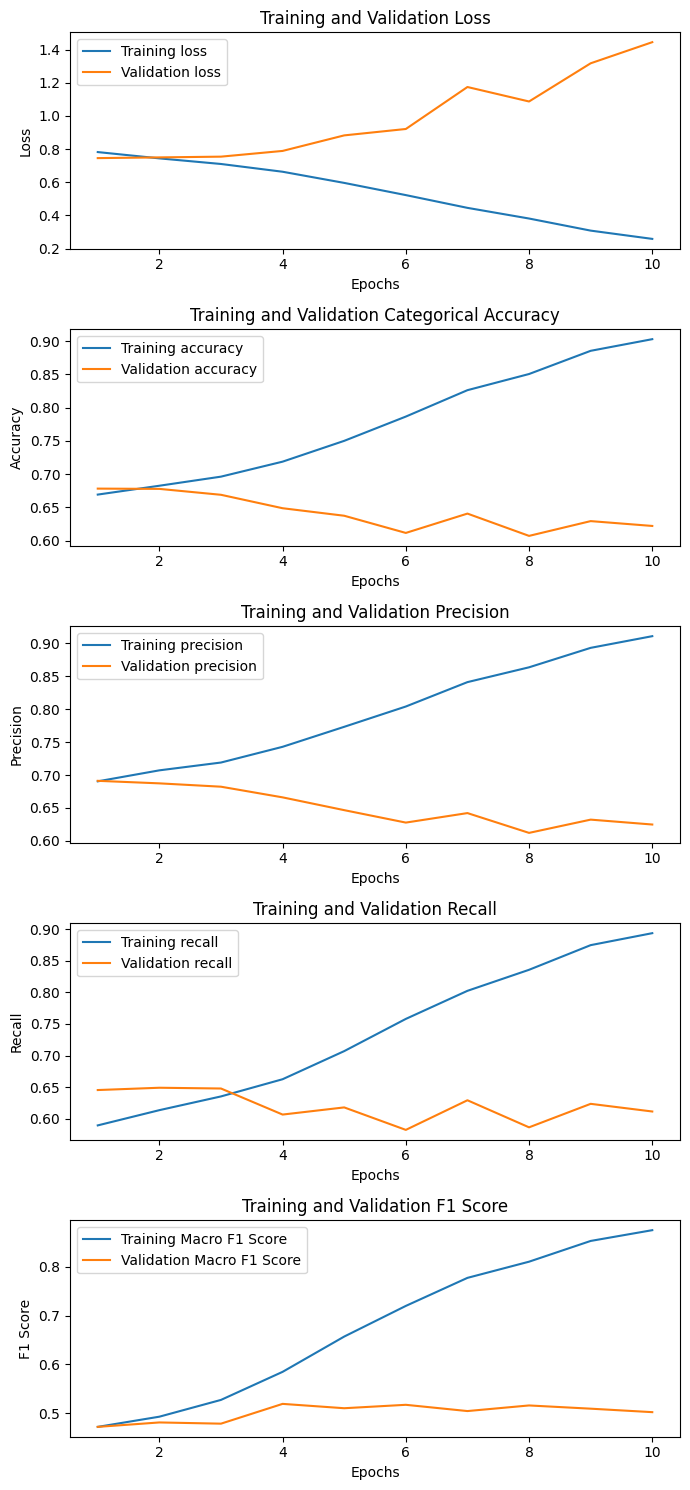

<Figure size 640x480 with 0 Axes>

In [ ]:
history_keys = list(model_history.history.keys())

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(7, 15))
epochs = range(1, len(model_history.history['loss']) + 1)

axes[0].plot(epochs, model_history.history[history_keys[0]], '-', label='Training loss')
axes[0].plot(epochs, model_history.history[history_keys[5]], '-', label='Validation loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(epochs, model_history.history[history_keys[1]], '-', label='Training accuracy')
axes[1].plot(epochs, model_history.history[history_keys[6]], '-', label='Validation accuracy')
axes[1].set_title('Training and Validation Categorical Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[2].plot(epochs, model_history.history[history_keys[2]], '-', label='Training precision')
axes[2].plot(epochs, model_history.history[history_keys[7]], '-', label='Validation precision')
axes[2].set_title('Training and Validation Precision')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Precision')
axes[2].legend()

axes[3].plot(epochs, model_history.history[history_keys[3]], '-', label='Training recall')
axes[3].plot(epochs, model_history.history[history_keys[8]], '-', label='Validation recall')
axes[3].set_title('Training and Validation Recall')
axes[3].set_xlabel('Epochs')
axes[3].set_ylabel('Recall')
axes[3].legend()

axes[4].plot(epochs, model_history.history[history_keys[4]], '-', label='Training Macro F1 Score')
axes[4].plot(epochs, model_history.history[history_keys[9]], '-', label='Validation Macro F1 Score')
axes[4].set_title('Training and Validation F1 Score')
axes[4].set_xlabel('Epochs')
axes[4].set_ylabel('F1 Score')
axes[4].legend()

plt.tight_layout()
plt.show()

plt.savefig(f"roberta_premise_article_dpr_{string_date}_history.png")

## Run model on test code

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

test_inputs = roberta_tokenizer.batch_encode_plus(
    test_df['transformer_input'].to_list(),
    max_length = msl,
    padding="max_length",
    truncation=True,
    return_tensors='tf'
)

test_labels = encoder.fit_transform(np.array(test_df['rating']).reshape(-1, 1))

In [ ]:
batch_size = 12
results = model.evaluate(
    [test_inputs.input_ids, test_inputs.attention_mask],
    test_labels,
    batch_size=batch_size
)

print(f"loss:\t\t{round(results[0], 5)}")
print(f"cat acc:\t{round(results[1], 5)}")
print(f"precision:\t{round(results[2], 5)}")
print(f"recall:\t\t{round(results[3])}")
print(f"f1 score:\t{results[4]}")

205/205 [==============================] - 17s 83ms/step - loss: 1.3214 - categorical_accuracy: 0.6461 - precision_4: 0.6489 - recall_4: 0.6359 - f1_score: 0.5391
loss:		1.32137
cat acc:	0.64612
precision:	0.6489
recall:		1
f1 score:	0.5391101837158203


In [ ]:
y_pred = model.predict([test_inputs.input_ids, test_inputs.attention_mask], batch_size=batch_size)

print(classification_report(test_labels.argmax(axis=1), y_pred.argmax(axis=1), target_names=["False", "Partially True/False", "True"]))

205/205 [==============================] - 18s 79ms/step
                      precision    recall  f1-score   support

               False       0.68      0.65      0.66      1032
Partially True/False       0.64      0.72      0.68      1209
                True       0.42      0.21      0.28       209

            accuracy                           0.65      2450
           macro avg       0.58      0.52      0.54      2450
        weighted avg       0.64      0.65      0.64      2450

